# Titanic: Machine Learning from Disaster

1. Libraries
2. Load datasets   
3. Exploratory Data Analysis (EDA)
4. Handling data  
    3.1 - Missing Values  
    3.2 - Outliers  
    3.3 - Feature selection  
    3.4 - Validating data
4. Model Development  
    4.1 - Choose ML algoritm  
    4.2 - Create ML model  
    4.3 - Testing and evaluating model  
5. Submission

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


### 1. Import Libraries

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 2. Load datasets

In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')
df_list = [df_train, df_test]

In [4]:
print('TRAIN DATASET')
df_train.info()
print('-'*60 + '\n' + '-'*60)
print('TEST DATASET')
df_test.info()

TRAIN DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
------------------------------------------------------------
------------------------------------------------------------
TEST DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-

In [5]:
# Datasets Dimensions
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [6]:
# Comparing columns of train and test datasets
df_train.columns [ ~df_train.columns.isin(df_test.columns) ]

Index(['Survived'], dtype='object')

### 3. Exploratory Data Analysis (EDA)

In [7]:
# Creating dataframe with train and test datasets together for analysis
df = pd.concat([df_train, df_test])

In [8]:
# Features information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
# Some descriptive statistics metrics of numeric features
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


Total number of passengers: 891
 - Survived: 342 (38%)
 - Not survived: 549 (62%)


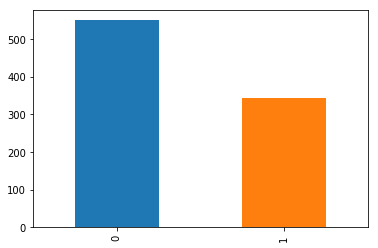

In [10]:
# Total number of passgengers (training set)
qtd_survived = len(df_train[df_train['Survived'] == 1])
qtd_notsurvived = len(df_train[df_train['Survived'] == 0])
total_passengers = len(df_train)

print('Total number of passengers: {}\n - Survived: {} ({:.0%})\n - Not survived: {} ({:.0%})'
      .format(total_passengers, qtd_survived, qtd_survived/total_passengers, qtd_notsurvived, qtd_notsurvived/total_passengers))

df_train['Survived'].value_counts().plot(kind='bar')

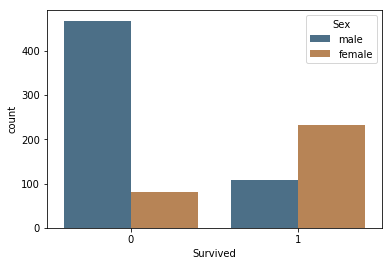

In [11]:
# Check if feature Sex has any indication of survival rates among passengers.
sns.countplot(x='Survived', data=df_train, hue='Sex', saturation = .4)

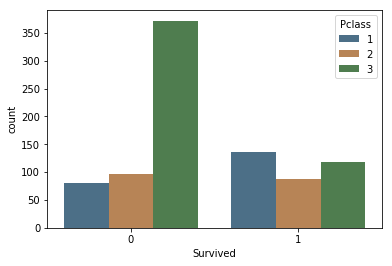

In [12]:
# Check if feature Pclass has any indication of survival rates among passengers.
sns.countplot(x='Survived', data=df_train, hue='Pclass', saturation=.4)

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64


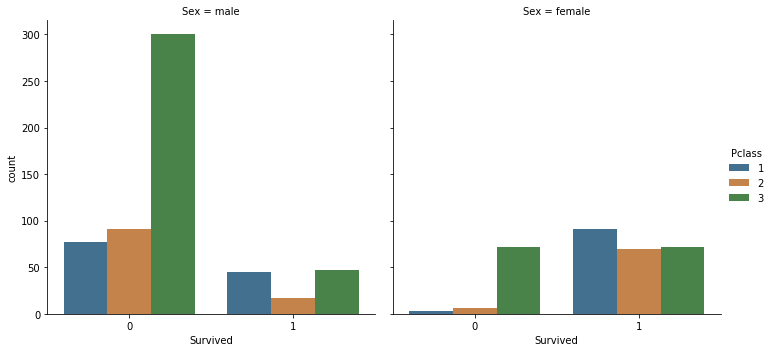

In [13]:
# Check if feature Pclass of Sex has any indication of survival rates among passengers.
print(df_train.groupby(['Sex', 'Pclass']).size())
sns.catplot(x='Survived', data=df_train, hue='Pclass', col='Sex', kind='count', saturation=0.5)

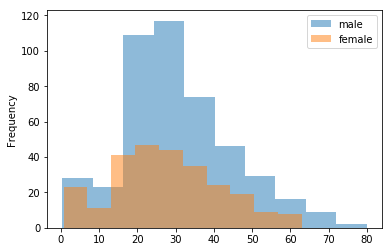

In [14]:
# Check if features Age and Sex has any indication of survival rates among passengers.
df_train[(df_train['Age'].notnull()) & (df_train['Sex'] == 'male')]['Age'].plot(kind='hist', alpha=.5, label='male', legend=True)
df_train[(df_train['Age'].notnull()) & (df_train['Sex'] == 'female')]['Age'].plot(kind='hist', alpha=.5, label='female', legend=True)

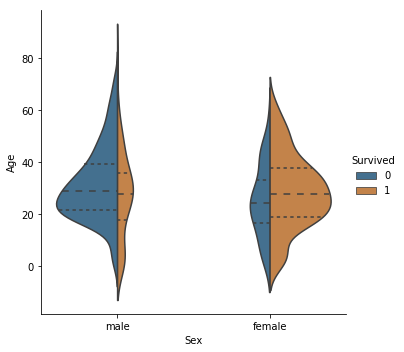

In [15]:
# Check if features Age and Sex has any indication of survival rates among passengers.
sns.catplot(x='Sex', y='Age', data=df_train, hue='Survived', kind='violin', split=True, saturation=0.5, inner='quartile', scale='count')

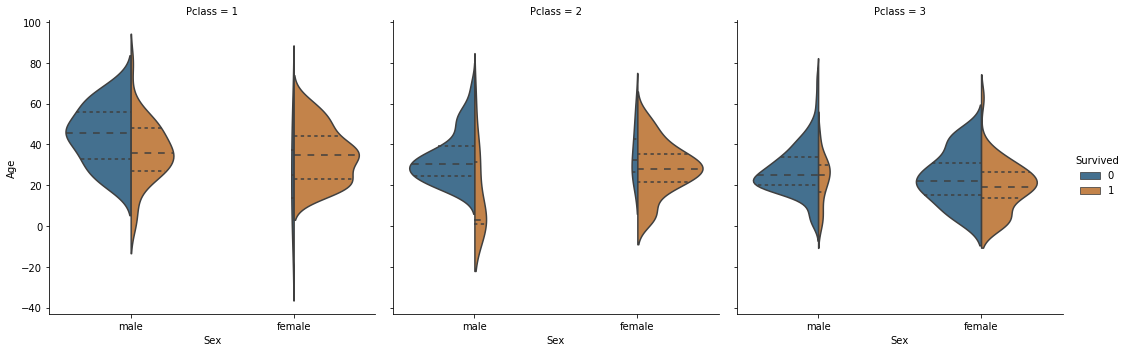

In [16]:
sns.catplot(x='Sex', y='Age', data=df_train, hue='Survived', kind='violin', col='Pclass', split=True, saturation=0.5, inner='quartile', scale='count')

### 4. Handling Data

#### 4.1 Missing Values

In [17]:
print('TRAINING DATASET')
print( df_train.isnull().sum() )
print('-'*60 + '\n' + '-'*60)
print('TEST DATASET')
print( df_test.isnull().sum() )

TRAINING DATASET
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------------------------------------
------------------------------------------------------------
TEST DATASET
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [18]:
# Fill NaN values with median of feature age
age_median = df.Age.median()
for dataset in df_list:
    dataset['Age'].fillna(age_median, inplace = True)

# Fill NaN values with mode of feature embarked
embarked_mode = df.Embarked.mode()[0]
for dataset in df_list:
    dataset['Embarked'].fillna(embarked_mode, inplace = True)

# Fill NaN values with median of feature fare
fare_median = df.Fare.median()
df_test['Fare'].fillna(fare_median, inplace = True)

# Fill NaN values with 'Unknown' value
for dataset in df_list:    
    dataset['Cabin'].fillna('Unknown', inplace = True)

In [19]:
print('TRAINING DATASET')
print( df_train.isnull().sum() )
print('-'*60 + '\n' + '-'*60)
print('TEST DATASET')
print( df_test.isnull().sum() )

TRAINING DATASET
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
------------------------------------------------------------
------------------------------------------------------------
TEST DATASET
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#### 4.2 Feature Engineering

In [20]:
# Transforming cabin feature in a single character value taking off numeric values
# Transform categorical value to numerical value
map_cabin = {'U':0, 'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7, 'T':8}
for dataset in df_list:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
    print(dataset['Cabin'].unique())
    dataset['Cabin'] = dataset['Cabin'].map(map_cabin)

['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['U' 'B' 'E' 'A' 'C' 'D' 'F' 'G']


In [21]:
# Transform sex feature in numerical value
map_sex = {'male':0, 'female':1}

for dataset in df_list:
    dataset['Sex'] = dataset['Sex'].map(map_sex)

In [22]:
# Transform embarked feature in numerical value
map_embarked = {'S':0, 'C':1, 'Q':2}

for dataset in df_list:
    dataset['Embarked'] = dataset['Embarked'].map(map_embarked)

In [23]:
# Creating family_size feature (SibSp + Parch + 1)
for dataset in df_list:
    dataset['family_size'] = dataset.apply(lambda x: x['SibSp'] + x['Parch'] + 1, axis=1)

In [24]:
# Creating title feature with name feature

print(df.Name.str.split(', ').str[1].str.split('.').str[0].value_counts())

map_title = {'Mr':0, 'Master':1, 'Mrs':2, 'Miss':3, 'Other':4}

for dataset in df_list:
    dataset['Title'] = dataset['Name'].str.split(', ').str[1].str.split('.').str[0]
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Rev', 'Dr', 'Col', 'Major', 'the Countess', 'Lady', 'Don', 'Capt', 'Sir', 'Dona', 'Jonkheer'], 'Other')
    dataset['Title'] = dataset['Title'].map(map_title)

print(df_train['Title'].value_counts(), df_test['Title'].value_counts())

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Mme               1
the Countess      1
Don               1
Capt              1
Jonkheer          1
Dona              1
Sir               1
Lady              1
Name: Name, dtype: int64
0    517
3    185
2    126
1     40
4     23
Name: Title, dtype: int64 0    240
3     79
2     72
1     21
4      6
Name: Title, dtype: int64


In [25]:
for dataset in df_list:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [26]:
# Format age feature to int type
for dataset in df_list:
    dataset['Age'] = dataset['Age'].astype(int)

#### 4.3 - Create train, target and test datasets

In [27]:
feature_list = ["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked", 'family_size', 'Title', 'Cabin']

data, target = df_train[feature_list], df_train['Survived']
data_test = df_test[feature_list]

### 5. Model Development

#### 5.1 KNN

In [28]:
knn = KNeighborsClassifier()
knn.fit(data, target)

scores = cross_val_score(knn, data, target, cv=5)
scores

array([0.77653631, 0.77653631, 0.79213483, 0.78089888, 0.8079096 ])

#### 5.2 Random Forest

In [29]:
forest = RandomForestClassifier(n_estimators = 1000, random_state=1)
forest.fit(data, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [30]:
forest.score(data, target)

0.9607182940516273

In [31]:
feature_importances = pd.Series(forest.feature_importances_, index=data.columns).sort_values(ascending=False)
print(feature_importances)

scores = cross_val_score(forest, data, target, cv=5, scoring='accuracy')
print(scores, scores.mean())

Age            0.270450
Title          0.191053
Sex            0.153441
Pclass         0.084073
Cabin          0.074302
Fare           0.068246
family_size    0.059879
Embarked       0.040341
SibSp          0.036000
Parch          0.022215
dtype: float64
[0.80446927 0.79888268 0.8258427  0.7752809  0.81355932] 0.8036069745693558


In [32]:
param_grid = {
    'max_depth': [5, 10, 20, 30],
    'max_features': [2, 3, 5, 10],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

In [33]:
grid = GridSearchCV(forest, param_grid, scoring='accuracy')

In [34]:
grid.fit(data, target)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 20, 30], 'max_features': [2, 3, 5, 10], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [35]:
grid.best_params_

{'max_depth': 5, 'max_features': 2, 'n_estimators': 100}

In [36]:
grid.best_estimator_.predict(data_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [37]:
#pred = forest.predict(data_test)
pred = grid.best_estimator_.predict(data_test)
output = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':pred})
output.to_csv('submission.csv', index=False)